0.0
0.0
[ 0.          5.13674631  0.02650739  4.83674631  0.          0.
  9.         -6.        ]


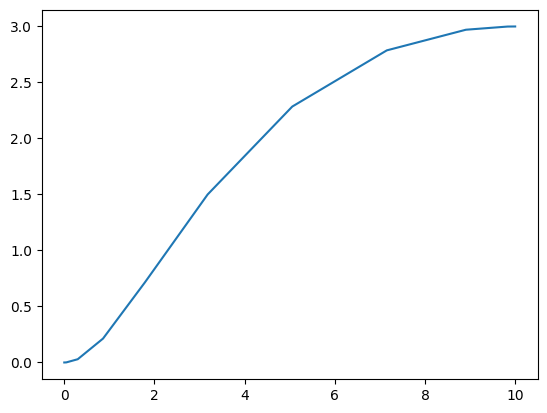

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math

"""
theta = the orientation of the cars frame in the world
phi = the steering angle
The configuration of the q = (x, y, theta, phi)
u1 = v_car or the linear speed of the car
u2 = phi_prime, the turning rate of the front wheel

q_prime = f(q, u1, u2)
x_prime = v_car * cos(theta) = u1 * cos(theta)
y_prime = v_car * sin(theta) = u1 * sin(theta)
phi_prime = u2
L = distance between rear and front axles
theta_prime = v_car * 1/L * tan(phi) = u1 * 1/L * tan(phi)
"""

def p(t, tf=10):
    return (10/tf**3) * t**3 - (15/tf**4) * t**4 + (6/tf**5) * t**5

# x(p) = a0 + a1 * p + a2 * p2^2 + a3 * p3^3
# y(p) = b0 + b1 * p + b2 * p2^2 + b3 * p3^3
def opt(p_out, x):
    x_der = (x[2] + 2 * x[3] * p_out + 3 * x[4] * p_out**2)**2
    y_der = (x[5] + 2 * x[6] * p_out + 3 * x[7] * p_out**2)**2
    return x_der**2 + y_der**2

def theta(p_out, x):
    x_der = (x[2] + 2 * x[3] * p_out + 3 * x[4] * p_out**2)**2
    y_der = (x[5] + 2 * x[6] * p_out + 3 * x[7] * p_out**2)**2
    return math.atan2(y_der, x_der)

start_x, start_y = 0, 0
end_x, end_y = 10, 3
start_theta, end_theta = 0, 0

x0 = [1, 1, 1.3, 0.7, 0.8, 1.9, 1.9, 1.2]
cons = (
    {'type': 'eq', 'fun': lambda x: x[0] - start_x},
    {'type': 'eq', 'fun': lambda x: x[4] - start_y},
    {'type': 'eq', 'fun': lambda x: x[5] - math.tan(math.radians(start_theta))},
    {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] - end_x},
    {'type': 'eq', 'fun': lambda x: x[4] + x[5] + x[6] + x[7] - end_y},
    {'type': 'eq', 'fun': lambda x: x[5] + 2 * x[6] + 3 * x[7] - math.tan(math.radians(end_theta))}
    )
res = minimize(
    lambda x : opt(0, x), x0, tol=1e-6, constraints=cons
    )
B = res.x
xs = []
ys = []
for i in range(11):
    p_out = p(i)
    x = B[0] + B[1] * p_out + B[2] * p_out**2 + B[3] * p_out**3
    y = B[4] + B[5] * p_out + B[6] * p_out**2 + B[7] * p_out**3
    xs.append(x)
    ys.append(y)
print(math.degrees(theta(1, B)))
print(math.degrees(theta(0, B)))
plt.plot(xs, ys)
print(res.x)
